<a href="https://colab.research.google.com/github/laxmena/100MLProjects/blob/master/Project2%20-%20Digit%20Recognition/MNIST_Digit_Recognition_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge2: MNIST Digit Recognition | #100MLProjects | #Laxmena

**Author: Lakshmanan Meiyappan**

100MLProjects Pre Project Update: [Blog: Challenge-2 MNIST Digit Recognition](https://medium.com/@laxmena/project2-of-100mlprojetcs-classification-mnist-digit-recognition-d9208856f1f2)

- LinkedIn: https://www.linkedin.com/in/lakshmanan-meiyappan/
- Github: https://github.com/laxmena/

## K-Nearest Neighbors
- Scikit Learn
- Custom Knn Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import gzip
import random

## Load MNIST Dataset

MNIST Dataset can be found here: http://yann.lecun.com/exdb/mnist/

File names of Training and Test sets:

- train-images-idx3-ubyte.gz -  training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz -  training set labels (28881 bytes)
- t10k-images-idx3-ubyte.gz  -  test set images (1648877 bytes)
- t10k-labels-idx1-ubyte.gz  -  test set labels (4542 bytes)


**load_mnist** 
A function to load MNIST data into iPython Notebook

**Parameters:**
- *filename* : Name of the MNIST '.gz' file with extension
- *type* : 'image' or 'label' to specify the type of data
- *n_datapoints* : Number of datapoints

In [2]:
def load_mnist(filename, type, n_datapoints):
    # MNIST Images have 28*28 pixels dimension
    image_size = 28
    f = gzip.open(filename)
    
    if(type == 'image'):
        f.read(16)    # Skip Non-Image information
        buf = f.read(n_datapoints * image_size * image_size)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(n_datapoints, image_size, image_size, 1)
    elif(type == 'label'):
        f.read(8) # Skip Inessential information
        buf = f.read(n_datapoints)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        data = data.reshape(n_datapoints, 1)
    return data

In [3]:
# Training Dataset
train_size = 60000
test_size = 10000
# dirpath = '/content/drive/My Drive/02 MNIST Digit Recognition/'
dirpath = ''
X = load_mnist(dirpath + 'train-images-idx3-ubyte.gz', 'image', train_size)
y = load_mnist(dirpath + 'train-labels-idx1-ubyte.gz', 'label', train_size)
X_test = load_mnist(dirpath + 't10k-images-idx3-ubyte.gz', 'image', test_size)
y_test = load_mnist(dirpath + 't10k-labels-idx1-ubyte.gz', 'label', test_size)

To verify whether the data is loaded properly, the image and label are randomly selected and visualized

Index:  41515
Training Set: 
Label: [3]


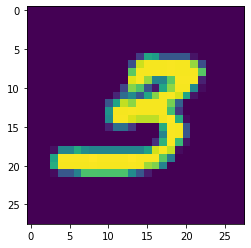

In [4]:
index = random.randint(0, train_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y[index])
img = np.asarray(X[index]).squeeze()
plt.imshow(img)
plt.show()

Index:  5205
Training Set: 
Label: [7]


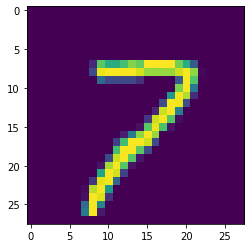

In [5]:
index = random.randint(0, test_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_test[index])
img = np.asarray(X_test[index]).squeeze()
plt.imshow(img)
plt.show()

t1 = X_test[index].reshape(1, 28*28)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[:(train_size//10)], y[:(train_size//10)], test_size=0.25, random_state=28)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4500, 28, 28, 1) (1500, 28, 28, 1) (4500, 1) (1500, 1)


## K-Nearest Neighbors

### Determining Optimal Number of Neighbors

To detect optimal value for 'K', lets compare the accuracy of KNN models with different 'K' values. 

By plotting the values in a graph, we can see the performance visually, and select the best performing 'K' value


In [7]:
score = []

for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
  pred = classifier.predict(X_valid.reshape(X_valid.shape[0], 28*28))
  accuracy = accuracy_score(y_valid, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("Confusion Matrix:\n", confusion_matrix(y_valid, pred))
  print("\n---------------\n")

Begin KNN with k= 1


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9506666666666667
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   3 127   0   0   0   0   2   2   0]
 [  2   1   1 151   0   3   1   0   1   1]
 [  0   4   0   0 157   0   2   0   0   6]
 [  1   0   0   0   2 128   1   0   0   2]
 [  1   0   0   0   0   0 157   0   1   0]
 [  0   4   0   1   1   2   0 166   0   3]
 [  0   1   3   4   0   2   0   1 110   0]
 [  4   0   1   1   5   0   0   3   0 131]]

---------------

Begin KNN with k= 2


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9266666666666666
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   6 126   0   0   0   1   1   0   0]
 [  2   2   2 150   0   2   1   1   1   0]
 [  0   8   0   0 156   0   2   0   0   3]
 [  4   1   0   1   2 125   1   0   0   0]
 [  1   0   0   0   1   2 155   0   0   0]
 [  1   6   1   1   7   1   0 159   0   1]
 [  0   3   6   5   0   7   0   0 100   0]
 [  5   2   0   2  10   1   0   5   0 120]]

---------------

Begin KNN with k= 3


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.938
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   5 126   1   0   0   0   1   1   0]
 [  2   2   0 152   0   3   0   0   0   2]
 [  0   7   0   0 155   0   1   0   0   6]
 [  4   2   0   2   2 119   1   0   2   2]
 [  2   0   0   0   1   1 155   0   0   0]
 [  1   4   0   0   5   0   0 163   0   4]
 [  0   3   4   7   0   1   0   0 106   0]
 [  4   1   0   2   1   0   1   4   0 132]]

---------------

Begin KNN with k= 4


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9386666666666666
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   5 126   1   0   0   1   1   0   0]
 [  2   2   0 154   0   1   0   0   0   2]
 [  0   6   0   0 158   0   1   0   0   4]
 [  3   1   0   5   1 117   1   1   2   3]
 [  2   0   0   0   0   1 156   0   0   0]
 [  1   4   0   0   3   1   0 165   0   3]
 [  0   3   4   5   0   3   0   0 106   0]
 [  4   1   0   2   4   0   1   6   0 127]]

---------------

Begin KNN with k= 5


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9393333333333334
Confusion Matrix:
 [[141   0   0   0   0   1   1   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  0   5 126   0   0   0   0   1   2   0]
 [  1   3   0 154   0   1   0   0   0   2]
 [  0   6   0   0 154   0   1   0   0   8]
 [  3   2   0   5   1 117   2   0   1   3]
 [  2   0   0   0   0   1 156   0   0   0]
 [  1   5   0   0   2   1   0 165   0   3]
 [  0   3   3   5   0   3   0   0 107   0]
 [  4   2   0   1   1   0   1   4   0 132]]

---------------

Begin KNN with k= 6


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.94
Confusion Matrix:
 [[141   0   0   0   0   1   1   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  1   6 123   1   0   0   0   1   2   0]
 [  1   3   0 155   0   0   0   0   0   2]
 [  0   6   0   0 155   0   1   0   0   7]
 [  3   1   0   5   1 117   2   1   1   3]
 [  1   1   0   0   0   1 156   0   0   0]
 [  0   5   0   0   2   1   0 167   0   2]
 [  0   3   3   6   0   1   0   0 108   0]
 [  4   1   0   2   1   0   1   5   0 131]]

---------------

Begin KNN with k= 7


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9366666666666666
Confusion Matrix:
 [[140   0   0   0   0   1   2   0   0   0]
 [  0 156   0   0   0   0   0   0   0   1]
 [  1   5 124   0   0   0   0   2   2   0]
 [  2   4   0 153   0   0   0   0   0   2]
 [  0   6   0   0 150   0   2   0   0  11]
 [  3   2   0   4   1 118   2   0   1   3]
 [  2   1   0   0   0   1 155   0   0   0]
 [  0   5   0   0   2   1   0 165   0   4]
 [  0   3   1   5   0   2   0   0 110   0]
 [  4   1   0   2   0   0   1   3   0 134]]

---------------

Begin KNN with k= 8


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.936
Confusion Matrix:
 [[141   0   0   0   0   1   1   0   0   0]
 [  0 156   0   0   0   0   0   0   0   1]
 [  1   5 125   0   0   0   0   1   2   0]
 [  1   4   0 154   0   0   0   0   0   2]
 [  0   6   0   0 154   0   2   0   0   7]
 [  3   2   0   5   1 118   2   0   0   3]
 [  2   1   0   0   0   1 155   0   0   0]
 [  0   6   0   0   1   1   0 165   0   4]
 [  0   3   2   7   0   3   0   0 106   0]
 [  3   1   0   2   2   1   1   5   0 130]]

---------------



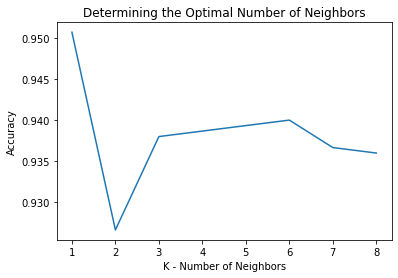

In [8]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Values of K, and performance  
- K = 1, accuracy = 94.1
- k = 2, accuracy = 92.2
- k = 3, accuracy = 93.3
- k = 4, accuracy = 93.5
- k = 5, accuracy = 93.5
- k = 6, accuracy = 92.8
- k = 7, accuracy = 93.2
- k = 8, accuracy = 93.1

Looking at the performance scores, K=1 might seem the most promising model as it has the highest accuracy.

But pragmatically, trying to predict a datapoint based on only one neighbor is definitely not a better choice to make. So, it's a wise choice to ignore the option.

There is a huge dip in performance for K=2, and a steep increase when the neighbors are increased to 3.

The performance curve increases for K=4, and stays same for k=5.

It's upto us to choose either 4 or 5 for our requirement.

In [10]:
%%time
print('Training the Model')
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y)

Training the Model
Wall time: 171 ms


C:\Users\manib\miniconda3\envs\menv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Testing the Model

In [15]:
%%time
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))

CPU times: user 16min 7s, sys: 142 ms, total: 16min 7s
Wall time: 16min 8s


In [16]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]
0.9688


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1011
           1       1.00      0.95      0.98      1187
           2       0.96      0.98      0.97      1009
           3       0.97      0.96      0.97      1012
           4       0.96      0.98      0.97       967
           5       0.97      0.97      0.97       893
           6       0.99      0.98      0.98       963
           7       0.96      0.96      0.96      1028
           8       0.94      0.99      0.96       924
           9       0.95      0.96      0.95      1006

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Results

KNN Model with 5 neighbors performed really well with 96.88% accuracy.



In [11]:
import joblib

joblib.dump(classifier, 'knn_m.gzip', compress=('gzip',3))

['knn_m.gzip']